In [9]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import cx_Oracle
import os
os.putenv(' NLS_LANG', '.UTF8')

from sqlalchemy import create_engine, text

In [7]:
dsn = cx_Oracle.makedsn('192.168.1.5', '1521', service_name = 'ORA11')
con = cx_Oracle.connect('dbam', 'dbamkass', dsn = dsn, encoding="UTF-8")
cur = con.cursor()

sql_k200 = " select 일자, 종목코드2 종목코드, 종목명_국문 종목명, 당일가격, 지수내비중, 상장주식수, 유동비율, \
            지수주식수, 지수시가총액 \
             from KASS1.TH068 \
             where 익일적용여부 ='NXT' \
             and ISIN = 'KRD020020016' \
             order by 지수내비중 desc "

cur.execute(sql_k200)
k200_df = pd.DataFrame(cur.fetchall(), columns = [x[0] for x in cur.description])

k200_df['일자']=pd.to_datetime(k200_df['일자'], format ='%Y%m%d')
k200_df.set_index(['일자', '종목코드'], inplace=True)
k200_df.index.names=['Dates', 'Symbol']
k200_df.columns=['name', 'close', 'idx_weight', 'num_shares', 'float_rate', 'idx_num_shares', 'idx_cap']
k200_df=k200_df.sort_index(0)

<ipython-input-7-4c682375b2e8>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  k200_df=k200_df.sort_index(0)


In [11]:
period1='2023-01-01'
period2='2023-08-31'

In [31]:
# load secotr weights
host = '192.168.1.27'
port = '3306'
db_name = 'quantdb_maria'
username = 'quantdb'
password = 'QuantDb2023!'

engine = create_engine("mysql+pymysql://" + username + ":" + password + "@" + host + ":" + port + "/" + db_name)
conn=engine.connect()

query_COM=f"select * from COM_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_COM=pd.read_sql(query_COM, conn)
data_COM.set_index(['Dates', 'Symbol'], inplace=True)


cap=k200_df['idx_weight']
sector=data_COM['KC_Industry']

In [38]:
# load model score
data_path='./data/output/prob_out/'
mlq_w=pd.read_csv(data_path + 'multilayer_factor_rolling_v1.0_2023-08-31.csv', index_col=0)


In [41]:
mlq_w

,A000060,A000070,A000080,A000100,A000120,A000150,A000210,A000240,A000270,A000660,...,A336260,A352820,A361610,A373220,A375500,A377300,A381970,A383220,A383800,A402340
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-30,NaN,0.060803,0.070842,0.066526,0.064018,0.061383,0.070311,0.063817,0.052000,0.053931,...,0.066262,0.069522,0.057799,NaN,0.069147,NaN,NaN,NaN,0.063437,NaN
2021-08-06,NaN,0.060803,0.070842,0.066526,0.064018,0.061383,0.070311,0.063817,0.052000,0.053931,...,0.066262,0.069522,0.057799,NaN,0.069147,NaN,NaN,NaN,0.063437,NaN
2021-08-13,NaN,0.060803,0.070842,0.066526,0.064018,0.061383,0.070311,0.063817,0.052000,0.053931,...,0.066262,0.069522,0.057799,NaN,0.069147,NaN,NaN,NaN,0.063437,NaN
2021-08-20,NaN,0.060803,0.070842,0.066526,0.064018,0.061383,0.070311,0.063817,0.052000,0.053931,...,0.066262,0.069522,0.057799,NaN,0.069147,NaN,NaN,NaN,0.063437,NaN
2021-08-27,NaN,0.076095,0.087149,0.084361,0.079834,0.071723,0.077817,0.080963,0.069602,0.039003,...,0.081603,0.083910,0.063013,NaN,0.087949,NaN,NaN,NaN,0.072201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-04,NaN,NaN,0.004234,0.002734,0.004007,0.004879,0.005317,0.005394,0.003500,0.000272,...,0.002978,0.002412,0.001915,0.000349,0.005288,0.002569,0.004453,0.005772,NaN,0.001607
2023-08-11,NaN,NaN,0.004234,0.002734,0.004007,0.004879,0.005317,0.005394,0.003500,0.000272,...,0.002978,0.002412,0.001915,0.000349,0.005288,0.002569,0.004453,0.005772,NaN,0.001607
2023-08-18,NaN,NaN,0.004234,0.002734,0.004007,0.004879,0.005317,0.005394,0.003500,0.000272,...,0.002978,0.002412,0.001915,0.000349,0.005288,0.002569,0.004453,0.005772,NaN,0.001607


In [42]:
mlq_w.index=pd.to_datetime(mlq_w.index)
# mlq_w=mlq_w[['code', 'weights']].pivot_table(index='dates', columns='code')
# mlq_w.columns=mlq_w.columns.get_level_values(1)

In [45]:
cap_combined=pd.concat([cap, sector, mlq_w.stack()], axis=1)

In [46]:
cap_combined['idx_weight']=cap_combined['idx_weight']/100

In [62]:
cap_combined=cap_combined.sort_values(by='Dates').dropna(0)

<ipython-input-62-aed5345c730d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  cap_combined=cap_combined.sort_values(by='Dates').dropna(0)


In [67]:
eom=cap_combined.index.get_level_values(0).unique()+pd.offsets.MonthEnd(0)
eom=eom.unique()


In [ ]:
# # use actual weight not count???

# weight_diff_ls=[]
# sector_weight_diff_ls=[]

# bm_cap_ls=[]
# port_cap_ls=[]

# bm_sector_cap_ls=[]
# port_sector_cap_ls=[]

# for i, date in enumerate(eom):
    
#     # selected_idx=pd.MultiIndex.from_product([[date], daily_w.loc[date][daily_w.loc[date]>0].index]) 
#     # selected_idx=cap_combined[cap_combined[0]>0].index
    
#     bm_cap_weight=cap_combined.loc[date][k200comp.loc[date]=='Y'].groupby('KSECapSize').sum()['idx_weight']
#     port_cap_weight=cap_combined.loc[date][cap_combined.loc[date][0]>0].groupby('KSECapSize').sum()[0]

#     weight_diff=port_cap_weight-bm_cap_weight
#     weight_diff_ls.append(weight_diff)
#     bm_cap_ls.append(bm_cap_weight)
    
#     bm_sector_weight=cap_combined.loc[date][k200comp.loc[date]=='Y'].groupby('FG_Sector_Idx').sum()['idx_weight']
#     port_sector_weight=cap_combined.loc[date][cap_combined.loc[date][0]>0].groupby('FG_Sector_Idx').sum()[0]
    
#     sector_weight_diff=port_sector_weight-bm_sector_weight
#     sector_weight_diff_ls.append(sector_weight_diff)

# Long Short - entire stocks / top n %

In [69]:
eom

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', name='Dates', freq=None)

In [83]:
cap_combined[0].unstack().T.shape

(206, 35)

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
raw_input=cap_combined[0].unstack().T


Dates,2023-01-06,2023-01-13,2023-01-20,2023-01-27,2023-02-03,2023-02-10,2023-02-17,2023-02-24,2023-03-03,2023-03-10,...,2023-06-30,2023-07-07,2023-07-14,2023-07-21,2023-07-28,2023-08-04,2023-08-11,2023-08-18,2023-08-25,2023-08-31
A271940,0.007921,0.007921,0.007921,0.003614,0.003614,0.003614,0.003614,0.004849,0.004849,0.004849,...,0.003363,0.003363,0.003363,0.003363,0.003572,0.003572,0.003572,0.003572,0.003572,0.003143
A017800,0.006676,0.006676,0.006676,0.003631,0.003631,0.003631,0.003631,0.004413,0.004413,0.004413,...,0.005287,0.005287,0.005287,0.005287,0.003430,0.003430,0.003430,0.003430,0.003430,0.001914
A017670,0.006511,0.006511,0.006511,0.003906,0.003906,0.003906,0.003906,0.004543,0.004543,0.004543,...,0.002887,0.002887,0.002887,0.002887,0.004103,0.004103,0.004103,0.004103,0.004103,0.003897
A016380,0.004920,0.004920,0.004920,0.001789,0.001789,0.001789,0.001789,0.003449,0.003449,0.003449,...,0.002986,0.002986,0.002986,0.002986,0.009659,0.009659,0.009659,0.009659,0.009659,0.006919
A016360,0.006677,0.006677,0.006677,0.003426,0.003426,0.003426,0.003426,0.004582,0.004582,0.004582,...,0.003964,0.003964,0.003964,0.003964,0.005599,0.005599,0.005599,0.005599,0.005599,0.004217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A139130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003367,0.003367,0.003367,0.003367,0.010096,0.010096,0.010096,0.010096,0.010096,0.007575
A003230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004452,0.004452,0.004452,0.004452,0.005383,0.005383,0.005383,0.005383,0.005383,0.003782
A005420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041034,0.041034,0.041034,0.041034,0.002351,0.002351,0.002351,0.002351,0.002351,0.001387
A001570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.698673,0.698673,0.698673,0.698673,0.001900,0.001900,0.001900,0.001900,0.001900,0.000037


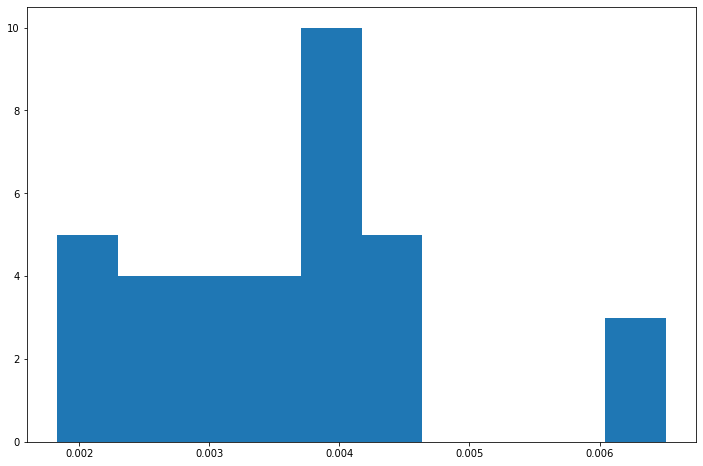

In [187]:
fig, ax1=plt.subplots(figsize=(12, 8))
plt.hist(raw_input.iloc[2].values)
plt.show()

In [188]:
scaler = StandardScaler()
tempw = scaler.fit_transform(raw_input)
tempw.shape

(206, 35)

In [189]:
temp_w=pd.DataFrame(tempw, index = raw_input.index, columns=raw_input.columns)
temp_w=temp_w.T


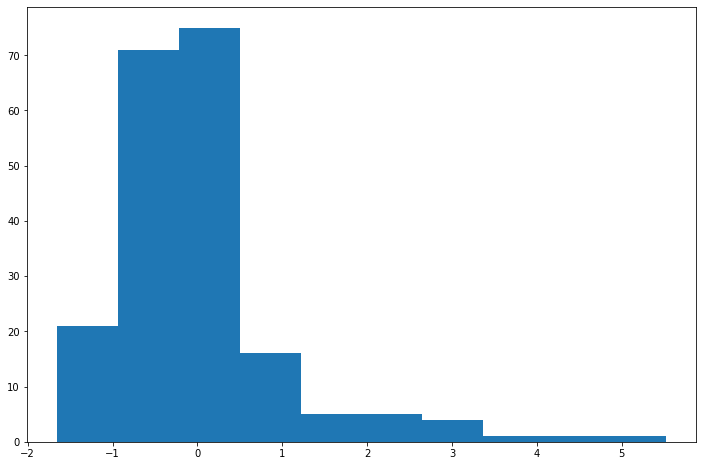

In [192]:
fig, ax1=plt.subplots(figsize=(12, 8))
plt.hist(temp_w.iloc[2].values)
plt.show()

In [181]:
temp_w.quantile(.5, axis=1)

Dates
2023-01-06   -0.190349
2023-01-13   -0.190349
2023-01-20   -0.190349
2023-01-27   -0.183562
2023-02-03   -0.183562
2023-02-10   -0.183562
2023-02-17   -0.183562
2023-02-24   -0.138006
2023-03-03   -0.138006
2023-03-10   -0.138006
2023-03-17   -0.138006
2023-03-24   -0.138006
2023-03-31   -0.134539
2023-04-07   -0.134539
2023-04-14   -0.132674
2023-04-21   -0.132674
2023-04-28   -0.161348
2023-05-04   -0.161348
2023-05-12   -0.161348
2023-05-19   -0.161348
2023-05-26   -0.117736
2023-06-02   -0.117736
2023-06-09   -0.118548
2023-06-16   -0.118548
2023-06-23   -0.118318
2023-06-30   -0.100400
2023-07-07   -0.100400
2023-07-14   -0.100400
2023-07-21   -0.100400
2023-07-28   -0.189712
2023-08-04   -0.189712
2023-08-11   -0.189712
2023-08-18   -0.189712
2023-08-25   -0.189712
2023-08-31   -0.180997
Name: 0.5, dtype: float64

In [193]:
temp_w.mean(1)

Dates
2023-01-06   -7.327472e-17
2023-01-13   -7.327472e-17
2023-01-20   -7.327472e-17
2023-01-27    2.588661e-16
2023-02-03    2.588661e-16
2023-02-10    2.588661e-16
2023-02-17    2.588661e-16
2023-02-24   -1.054712e-16
2023-03-03   -1.054712e-16
2023-03-10   -1.054712e-16
2023-03-17   -1.054712e-16
2023-03-24   -1.054712e-16
2023-03-31    7.252713e-17
2023-04-07    7.252713e-17
2023-04-14   -2.926952e-16
2023-04-21   -2.926952e-16
2023-04-28   -9.992007e-17
2023-05-04   -9.992007e-17
2023-05-12   -9.992007e-17
2023-05-19   -9.992007e-17
2023-05-26   -4.440892e-17
2023-06-02   -4.440892e-17
2023-06-09   -4.037175e-17
2023-06-16   -4.037175e-17
2023-06-23   -2.254260e-17
2023-06-30   -1.776357e-17
2023-07-07   -1.776357e-17
2023-07-14   -1.776357e-17
2023-07-21   -1.776357e-17
2023-07-28    8.881784e-17
2023-08-04    8.881784e-17
2023-08-11    8.881784e-17
2023-08-18    8.881784e-17
2023-08-25    8.881784e-17
2023-08-31   -8.881784e-18
dtype: float64

In [121]:
# # temp_w[temp_w>1] = 1
# # temp_w[temp_w<-1] = -1


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 206 BarContainer objects>)

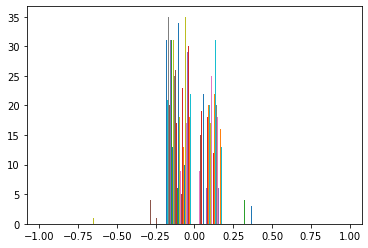

In [122]:
plt.hist(temp_w.values)

In [159]:
temp_w[temp_w>3]=3
temp_w[temp_w<-3]=-3

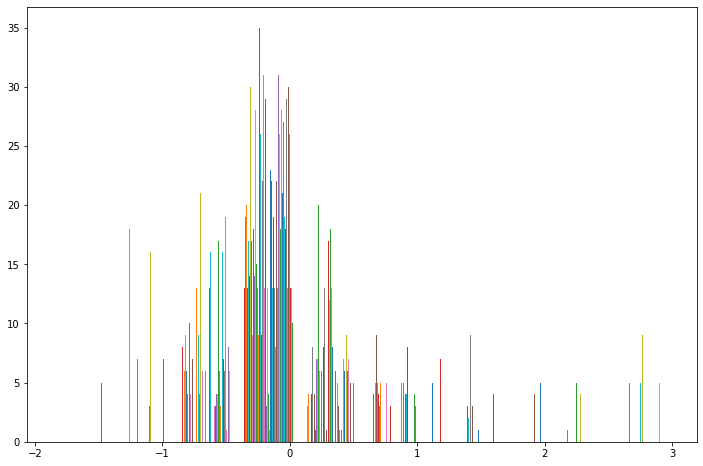

In [160]:
fig, ax1=plt.subplots(figsize=(12, 8))
plt.hist(temp_w.values)
plt.show()

In [152]:
temp_w[temp_w>3].fillna(0).sum(1)

Dates
2023-01-06    20.039478
2023-01-13    20.039478
2023-01-20    20.039478
2023-01-27    21.302919
2023-02-03    21.302919
2023-02-10    21.302919
2023-02-17    21.302919
2023-02-24    17.932552
2023-03-03    17.932552
2023-03-10    17.932552
2023-03-17    17.932552
2023-03-24    17.932552
2023-03-31    16.923317
2023-04-07    16.923317
2023-04-14    16.879418
2023-04-21    16.879418
2023-04-28    18.890074
2023-05-04    18.890074
2023-05-12    18.890074
2023-05-19    18.890074
2023-05-26    13.743479
2023-06-02    13.743479
2023-06-09    13.674895
2023-06-16    13.674895
2023-06-23    13.640207
2023-06-30    13.812998
2023-07-07    13.812998
2023-07-14    13.812998
2023-07-21    13.812998
2023-07-28    22.220536
2023-08-04    22.220536
2023-08-11    22.220536
2023-08-18    22.220536
2023-08-25    22.220536
2023-08-31    19.554715
dtype: float64

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 4., ..., 0., 0., 0.],
        ...,
        [0., 0., 6., ..., 0., 0., 0.],
        [0., 1., 5., ..., 0., 0., 4.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.87242058, -1.38517852, -0.89793647, -0.41069441,  0.07654765,
         0.56378971,  1.05103177,  1.53827383,  2.02551588,  2.51275794,
         3.        ]),
 <a list of 206 BarContainer objects>)

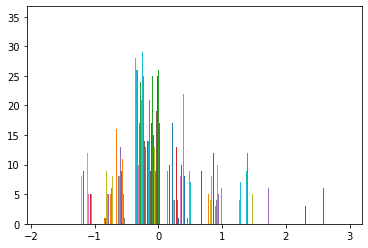

In [153]:
temp_w[temp_w>3]=3
temp_w[temp_w<-3]=-3
plt.hist(temp_w.values)

In [ ]:
topn=.2

In [175]:
short_thres=temp_w.iloc[0].quantile(.2) 
long_thres=temp_w.iloc[0].quantile(.8)

In [177]:
short_side=temp_w.iloc[0][temp_w.iloc[0]<short_thres].sum()

-38.48862764641245

In [ ]:
short_side

### if the amount of prob has confidence 
### then fix long and short the same amount of long weight but can be different number of stocks
### if not long top n / short top n

<AxesSubplot: >

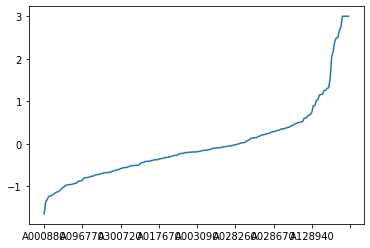

In [168]:
temp_w.iloc[0].dropna().sort_values().plot()

In [ ]:
# entire score long / short

ls_weight = pd.concat(ls_weight_ls, axis=1).T
ls_weight.index = pre_rank.index
ls_weight = ls_weight.shift(1)

ls_weight_adj = ls_weight.iloc[-1].rank(pct = True) - ls_weight.iloc[-1].rank(pct = True).mean()



# top n% long /short






# Long only - proportion to BM weight / sector neutral / equal weight

In [ ]:
# top n% equal weight long only 





# top n% market weight tilt





tilt = .1
active_weight = pd.concat([k200w_final[ls_weight.iloc[-1].index].iloc[-2], ls_weight_adj], axis=1)
active_weight.columns = ['bm', 'active_weight']
active_weight['bm'] = active_weight['bm'] / 100
active_weight['bm_tilt'] = active_weight['bm'] + tilt * active_weight['active_weight']
active_weight['bm_limit'] = np.where(active_weight['active_weight']>=0, active_weight['bm'], -active_weight['bm'])

# if bm_tilt <0, more weights to add to others
# 
(tilt * active_weight['active_weight'][active_weight['active_weight']>=0].sum()), 
active_weight['bm_tilt'] = active_weight['bm'] + tilt * active_weight['active_weight']
active_weight['bm_tilt'][active_weight['bm_tilt']<0].sum()

(active_weight['active_weight'] * (active_weight['bm_tilt'] - active_weight['bm'])).sum()

((active_weight['bm_tilt'] < active_weight['bm_limit']) & (active_weight['bm_tilt']<0))

active_weight['bm_tilt'][active_weight['bm_tilt'] < active_weight['bm_limit']] = active_weight['bm_limit']

active_weight['bm_tilt'][active_weight['bm_tilt']>0].sum(), active_weight['bm_tilt'][active_weight['bm_tilt']<0].sum()

def objective(trial):
    x = trial.suggest_float('x', 0.01, .2)
    
    bm_tilt = active_weight['bm'] + x * active_weight['active_weight']
    bm_tilt[bm_tilt < active_weight['bm_limit']] = active_weight['bm_limit']
    neg_bet = bm_tilt[bm_tilt<0].sum()
    pos_bet = bm_tilt[bm_tilt>0].sum()
    bet_diff = pos_bet + neg_bet
    
    # how to decrease weights in pos bet 
        
    return pos_bet + neg_bet


opt_tilt = optuna.create_study(direction="minimize")
opt_tilt.optimize(objective, n_trials=30, n_jobs=-1)
best_params = opt_tilt.best_params    


from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances

plot_optimization_history(opt_tilt)


weight = pd.concat(ranked_ls, axis=1).T
weight = weight.shift(1).dropna(how = 'all', axis=0)
weight =weight.div(weight.sum(1), axis=0)
weight = weight.fillna(0)

idx_ret, idx_ret_cost, idx_cum_ret, idx_cum_retcost = perf.return_index(price, 
                                                                        weight)


temp_perf = perf.analyze_performance(idx_ret_cost.loc['2009-12-30':'2023-03-31'], 
                                     model_name = 'factor',
                                     base_date_period = 252,
                                     weights = weight)


